## How often does President Trump tweet each day?

In [364]:
import pandas as pd
import psycopg2 as pg
import matplotlib as mpl
import numpy as np
import json
import altair_latimes as lat
alt.renderers.enable('notebook')
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

### Local url for @realDonaldTrump scraped data: 2012 - Aug. 2019

In [365]:
url = '/Users/mhustiles/Desktop/github/twint/trump.json'

### Local url for @realDonaldTrump data, update for 8/13/19

In [366]:
urladd = '/Users/mhustiles/Desktop/github/twint/trumpnu.json'

### Read data, concatenate, remove duplicate tweets from update

In [367]:
trumptweets = pd.read_json(url, orient='columns', lines=True)
trumptweetsnu = pd.read_json(urladd, orient='columns', lines=True)
trumpall = pd.concat([trumptweets, trumptweetsnu]).drop_duplicates('id').sort_values(['created_at'], ascending=False)

### Clean up data types in scraped data

In [368]:
trumpall['retweet'] = trumpall['retweet'].astype(str)
trumpall['video'] = trumpall['video'].astype(str)
trumpall['user_id'] = trumpall['user_id'].astype(str)
trumpall['user_id'] = trumpall['user_id'].astype(str)
trumpall['id'] = trumpall['id'].astype(str)
trumpall['conversation_id'] = trumpall['conversation_id'].astype(str)

### Add columns parsing dates to dataframe

In [369]:
trumpall['year'] = trumpall['date'].dt.year
trumpall['month'] = trumpall['date'].dt.month
trumpall['day'] = trumpall['date'].dt.day

### Get GMT time

In [370]:
trumpall['hour_gmt'] = trumpall['created_at'].dt.hour

### Clean them up

In [371]:
trumpall['year'] = trumpall['year'].astype(str)
trumpall['month'] = trumpall['month'].astype(str)
trumpall['day'] = trumpall['day'].astype(str)
trumpall['hour_gmt'] = trumpall['hour_gmt'].astype(str)

### What did he average each day in retweets, likes and replies

In [372]:
trump_engagements_day = trumpall.groupby(['date']).mean().round(0).reset_index()

### Limit data to when Trump took office

In [373]:
trumpall_prez = trumpall[trumpall.date >= '2017-01-20']

### Count daily tweets, create dataframe with results

In [374]:
trump_tweets_day = trumpall_prez.groupby(['date']).size()
trump_tweets_day_prez_df = pd.DataFrame({'date': trump_tweets_day.index, 'count': trump_tweets_day.values})

### Sort table to see top days

In [375]:
trump_freq_prez = trump_tweets_day_df.sort_values(['count'], ascending=False)

In [376]:
trump_freq_prez.head()

,date,count
889,2019-07-11,55
887,2019-07-09,46
901,2019-07-23,40
890,2019-07-12,40
902,2019-07-24,35


### Read all from today

In [377]:
trump_tweets_today = trumpall[trumpall.date == '2019-08-13']

### Chart it!

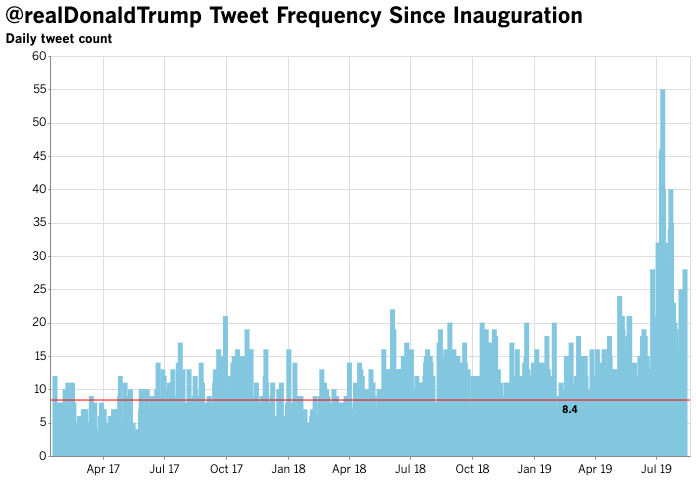

In [379]:
#bars

lines = alt.Chart(trump_freq_prez, title = '@realDonaldTrump Tweet Frequency Since Inauguration').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b %y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 60)), axis = alt.Axis(title = 'Daily tweet count')),
)

#rule showing mean

rule = alt.Chart(trump_freq_prez).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( lines + rule + text ).properties(height=400,width=640)